In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


Text(0.5, 0, 'frog')

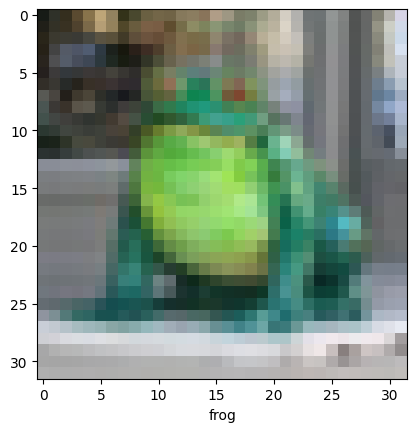

In [33]:
index = 19
plt.imshow(X_train[index])
plt.xlabel(classes[y_train[index][0]])

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(1500, activation='leaky_relu'),
    keras.layers.Dense(700, activation='leaky_relu'),
    keras.layers.Dense(300, activation='leaky_relu'),
    keras.layers.Dense(150, activation='leaky_relu'),
    keras.layers.Dense(50, activation='leaky_relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 143s 91ms/step - loss: 1.9480 - accuracy: 0.2910
Epoch 2/10
1563/1563 [==============================] - 138s 89ms/step - loss: 1.7649 - accuracy: 0.3641
Epoch 3/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.6741 - accuracy: 0.3986
Epoch 4/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.6127 - accuracy: 0.4200
Epoch 5/10
1563/1563 [==============================] - 134s 86ms/step - loss: 1.5810 - accuracy: 0.4334
Epoch 6/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.5254 - accuracy: 0.4553
Epoch 7/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4901 - accuracy: 0.4695
Epoch 8/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4599 - accuracy: 0.4785
Epoch 9/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4260 - accuracy: 0.4922
Epoch 10/10
1563/1563 [==============================] 

313/313 [==============================] - 6s 18ms/step


Text(95.72222222222221, 0.5, 'Truth')

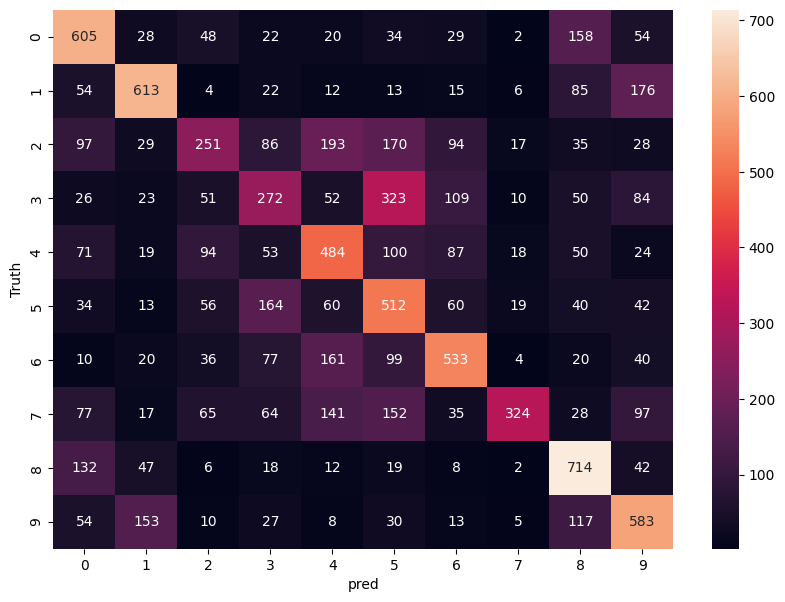

In [35]:
model.evaluate(X_test,y_test)
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [36]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred_labels)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred_labels)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred_labels)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred_labels)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred_labels))

Mean Squared Error: 9.6488
Mean Absolute Error: 1.8412
R-squared: -0.16955151515151523
Accuracy Score: 0.4891
Confusion Matrix : 
[[605  28  48  22  20  34  29   2 158  54]
 [ 54 613   4  22  12  13  15   6  85 176]
 [ 97  29 251  86 193 170  94  17  35  28]
 [ 26  23  51 272  52 323 109  10  50  84]
 [ 71  19  94  53 484 100  87  18  50  24]
 [ 34  13  56 164  60 512  60  19  40  42]
 [ 10  20  36  77 161  99 533   4  20  40]
 [ 77  17  65  64 141 152  35 324  28  97]
 [132  47   6  18  12  19   8   2 714  42]
 [ 54 153  10  27   8  30  13   5 117 583]]
Full report : 
              precision    recall  f1-score   support

           0       0.52      0.60      0.56      1000
           1       0.64      0.61      0.62      1000
           2       0.40      0.25      0.31      1000
           3       0.34      0.27      0.30      1000
           4       0.42      0.48      0.45      1000
           5       0.35      0.51      0.42      1000
           6       0.54      0.53      0.54  